# Final Project 1 (Kelompok 5)

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

### Perkenalan 

1. Latar belakang.
> Enih latber

2. Data
> Data yang digunakan adalah 'Uber and Lyft Dataset Boston, MA' dimana data ini diambil dari website open source Kaggle. Data ini memuat sebanyak 57 kolom dan 693071 baris data. Kolom label atau target variabel dari data ini adalah kolom 'price' dimana kolom dengan value kontinu ini memuat nilai yang mana nilai tersebut dipengaruhi oleh faktor/kolom lainnya.

3. Capaian
> Menggunakan data ini, akan dibangun sebuah model dimana digunakan data feature(independen variabel) dan data label(dependen variabel) untuk melatih model agar mampu membuat prediksi harga atau tagihan transportasi(output berupa nilai kontinu) menggunakan algoritma linear regression. 







### Import Pustaka

In [1]:
# import library
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Score of accuracy regression model
from sklearn.metrics import r2_score

Dilakukan import library  dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model regresi ini.

### Data Loading

In [2]:
# read data
import pandas as pd
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dilakukan read file csv yang mana memuat dataset berisikan data Uber dan Lyft tepatnya di kota Boston. Kemudian ditampilkan data teratas untuk melihat gambaran data secara umum.

In [3]:
# shape of the dataset
df.shape

(693071, 57)

Bertujuan untuk melihat bentuk data (jumlah baris, jumlah kolom).





In [4]:
# check null values
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dilakukan pengecekan nilai null di masing-masing kolom dimana nilai null tersebut dihitung jumlahnya dan diberikan output berupa total null values dari masing-masing kolom.

In [5]:
# show information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dilihat informasi dari dataset menggunakan fungsi info() dimana akan diberikan output berupa daftar nama kolom, informasi jumlah data non-null di masing-masing kolom serta tipe data dari masing-masing kolom.

### Data Cleaning

In [6]:
# assign kolom yang akan digunakan
df = df[['name', 'cab_type','surge_multiplier', 'distance', 'price']]

In [7]:
df

,name,cab_type,surge_multiplier,distance,price
0,Shared,Lyft,1.0,0.44,5.0
1,Lux,Lyft,1.0,0.44,11.0
2,Lyft,Lyft,1.0,0.44,7.0
3,Lux Black XL,Lyft,1.0,0.44,26.0
4,Lyft XL,Lyft,1.0,0.44,9.0
...,...,...,...,...,...
693066,UberXL,Uber,1.0,1.00,13.0
693067,UberX,Uber,1.0,1.00,9.5
693068,Taxi,Uber,1.0,1.00,NaN
693069,Black SUV,Uber,1.0,1.00,27.0


Kami memilih price sebagai dependen variabel atau target variable yang mana akan menjadi sesuatu yang akan diprediksi. Dikarenakan jumlah kolom dari data awal terlalu besar, dipilih beberapa kolom yang sekiranya sangat mempengaruhi nilai dari price. Menurut kami, name(jenis/merk kendaraan), surge_multiplier dan distance(jarak) memberikan pengaruh yang besar untuk kenaikan atau penurunan harga transportasi.

In [8]:
# mencari value error pada kolom name
cnt = 0 
for row in df['name']:
    try:
        float(row)
        df.loc[cnt, 'name'] = np.nan
    except ValueError:
        pass
    cnt += 1

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom name terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [9]:
# mencari value error pada kolom surge_multiplier
cnt = 0 
for row in df['surge_multiplier']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc[cnt, 'surge_multiplier'] = np.nan
    cnt += 1

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom surge_multiplier terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [10]:
# mencari value error pada kolom distance
cnt = 0 
for row in df['distance']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc[cnt, 'distance'] = np.nan
    cnt += 1

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom distance terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [11]:
# mencari value error pada kolom price
cnt = 0 
for row in df['price']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc[cnt, 'price'] = np.nan
    cnt += 1

Dilakukan pengecekan value error atau kondisi dimana di dalam kolom price terdapat data yang tidak sesuai dimana setelah itu value error tersebut akan digantikan dengan NaN.

In [12]:
# check null values
df.isna().sum()

name                    0
cab_type                0
surge_multiplier        0
distance                0
price               55095
dtype: int64

Setelah dilakukan pemeriksaan error values, dilakukan pengecekan nilai NaN lagi untuk memastikan apakah error values ditemukan dan telah teratasi yang kemudian akan dilanjutkan dengan handling missing values.

In [13]:
# menampilkan bentuk data
df.shape

(693071, 5)

Setelah ditampilkan bentuk data, jika dibandingkan dengan jumlah missing value ada sekitar 7% missing data dari keseluruhan data. Oleh karena itu, dilakukan drop missing value dikarenakan jumlahnya yang sedikit dianggap tidak terlalu memberikan pengaruh untuk proses membangun model.

In [14]:
# menghapus missing value
df.dropna(inplace=True)

Menggunakan dropna() dilakukan penghapusan nilai NaN dengan parameter axis defaultnya adalah 0 dimana akan dilakukan penghapusan nilai NaN berdasarkan index atau baris. Sehingga, setelah dilakukan drop missing values jumlah data akan berkurang.

In [15]:
# check nilai NaN
df.isna().sum()

name                0
cab_type            0
surge_multiplier    0
distance            0
price               0
dtype: int64

Setelah diperiksa kembali, dapat disimpulkan data telah bersih dari missing values.

### Eksplorasi Data

Untuk mengetahui jenis/tipe mobil manakah yang sering dipesan oleh pelanggan, dapat digunakan fungsi `.value_counts()` untuk menghitung total jumlah pemesanan setiap jenis/tipe mobil. Fungsi `.sort_values(ascending=True)` digunakan untuk mengurutkan value dari total jumlah pemesanan setiap jenis/tipe mobil dari yang paling sedikit ke paling banyak.

In [16]:
df_name = df.name.value_counts()
df_name = df_name.sort_values(ascending=True)
df_name

Shared          51233
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
UberPool        55091
UberX           55094
Black           55095
UberXL          55096
WAV             55096
Black SUV       55096
Name: name, dtype: int64

Hasil yang didapatkan dapat divisualisasikan menggunakan bar plot atau diagram batang menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

- `kind='bar' `: mendefinisikan jenis plot yang digunakan yaitu bar plot
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

- `plt.title()` : memberi judul pada plot
- `plt.xlabel()` : memberi keterangan pada sumbu X
- `plt.ylable()` : memberi keterangan pada sumbu Y
- `size= ` : mengatur ukuran

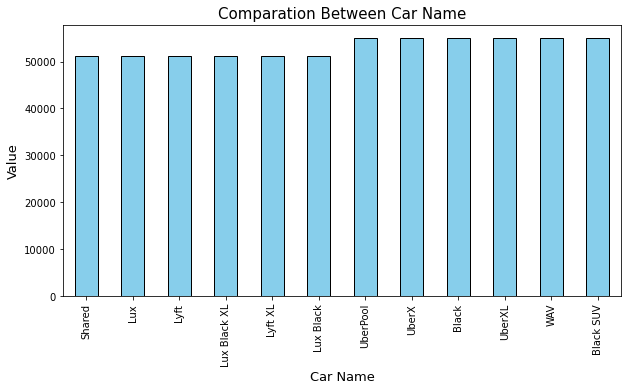

In [17]:
df_name.plot(kind='bar', figsize=(10,5), color='skyblue', edgecolor='black')
plt.title('Comparation Between Car Name', size=15)
plt.xlabel('Car Name', size=13)
plt.ylabel('Value', size=13)
plt.show()

Berdasarkan bar plot, dapat diketahui bahwa mobil jenis Shared adalah jenis mobil yang paling sedikit dipesan oleh pelanggan. Sedangkan mobil jenis Black SUV adalah jenis mobil yang paling banyak dipesan oleh pelanggan.

Informasi mengenai statistik deskriptif dari set data dapat diketahui menggunakan fungsi `.describe()`. Informasi yang diperoleh adalah ringkasan mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data.

In [18]:
df.describe()

,surge_multiplier,distance,price
count,637976.000000,637976.000000,637976.000000
mean,1.015068,2.189261,16.545125
std,0.095422,1.135413,9.324359
min,1.000000,0.020000,2.500000
25%,1.000000,1.270000,9.000000
50%,1.000000,2.160000,13.500000
75%,1.000000,2.930000,22.500000
max,3.000000,7.860000,97.500000


Berdasarkan informasi mengenai statistik deskriptif, dapat diketahui:
- Rata-rata pelanggan melakukan perjalanan sejauh 1.135413 (satuan jarak)
- Rata-rata harga yang harus dibayarkan pelanggan dalam satu kali perjalanan adalah 9.324359 USD
- Rata-rata surge multiplier adalah 1.015068

Untuk mengetahui berapa biaya price/distance pada setiap jenis mobil perlu dilakukan groupby pada dataframe df berdasarkan kolom name. Kemudian dilakukan penambahan kolom baru pada dataframe yang berisikan nilai dari value pada kolom price dibagi dengan value pada kolom distance.

In [19]:
df_name_2 = df.groupby('name').sum()
df_name_2['price/distance'] = df_name_2['price'] / df_name_2['distance']
df_name_2

,surge_multiplier,distance,price,price/distance
name,,,,
Black,55095.00,120735.12,1130758.00,9.365610
Black SUV,55096.00,120736.15,1668679.50,13.820877
Lux,53139.75,112049.32,910509.50,8.125971
Lux Black,53139.75,112049.32,1181605.55,10.545406
Lux Black XL,53139.75,112049.32,1656124.55,14.780318
Lyft,53184.25,112049.32,492413.68,4.394616
Lyft XL,53184.25,112049.32,784375.20,7.000267
Shared,51233.00,112047.19,308929.50,2.757137
UberPool,55091.00,120726.22,482184.00,3.994029


Hasil yang didapatkan diurutkan menggunakan fungsi `.sort_values()` dari nilai yang terkecil hingga terbesar kemudian divisualisasikan menggunakan bar plot atau diagram batang menggunakan fungsi `.plot()` dengan argumen yang disesuaikan.

- `kind='bar' `: mendefinisikan jenis plot yang digunakan yaitu bar plot
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

- `plt.title()` : memberi judul pada plot
- `plt.xlabel()` : memberi keterangan pada sumbu X
- `plt.ylable()` : memberi keterangan pada sumbu Y
- `size= ` : mengatur ukuran

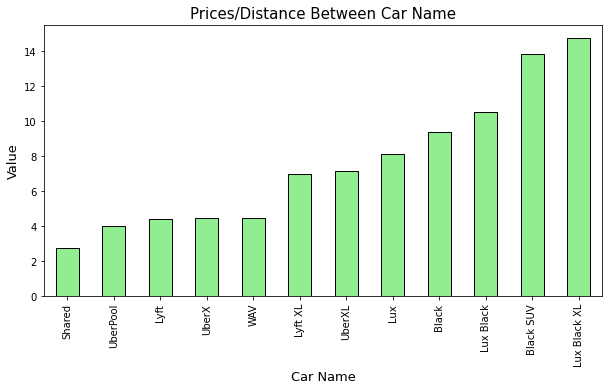

In [20]:
df_name_2['price/distance'].sort_values(ascending=True).plot(kind='bar',figsize=(10,5), color='lightgreen', edgecolor='black')
plt.title('Prices/Distance Between Car Name',size=15)
plt.xlabel('Car Name',size=13)
plt.ylabel('Value',size=13)
plt.show()

Berdasarkan plot, dapat diketahui bahwa biaya price/distance jenis mobil Shared adalah yang paling terjangkau. Sedangkan mobil jenis Lux Black XL memiliki biaya price/distance termahal.

Pengecekan terhadap outlier pada set data dapat dilakukan menggunakan box plot atau diagram kotak garis menggunakan fungsi `.plot()` dengan parameter `kind='box'` yaitu untuk mendefinisikan plot sebagai box plot dan parameter `figsize=(30,20)` untuk mendefinisikan ukuran dari plot yang akan dibuat.

<AxesSubplot:>

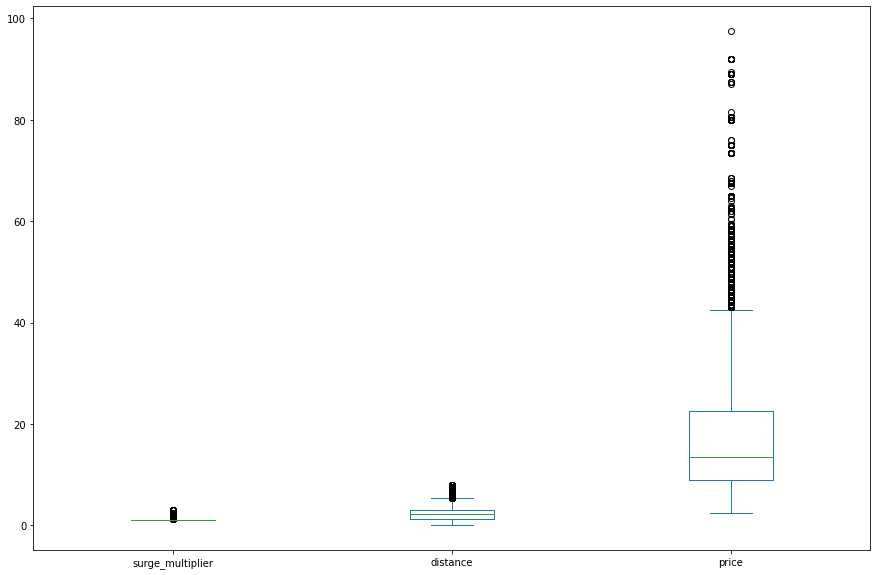

In [21]:
df.plot(kind='box',figsize=(15,10))

Berdasarkan box plot, ditemukan outlier pada ketiga kolom yaitu **surge_multiplier**, **distance**, dan **price**.

Sebaran pada data label dapat diketahui melalui histogram atau plot distribusi peluang.

Histogram didapatkan menggunakan fungsi `.plot()` dengan parameter yang disesuaikan. 

- `kind='hist' `: mendefinisikan jenis plot yang digunakan yaitu histogram
- `figsize=()` : mendefinisikan ukuran dari plot yang akan dibuat
- `color=' '` : memberi warna pada plot
- `edgecolor=' '` : memberi warna pada tepi plot

<AxesSubplot:ylabel='Frequency'>

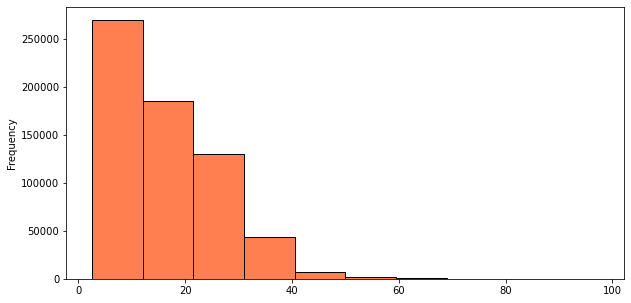

In [22]:
df['price'].plot(kind='hist', figsize=(10,5), color='coral', edgecolor='black')

Sedangkan plot distribusi peluang didapatkan menggunakan fungsi `sns.displot()` dengan parameter `df['price']` yaitu kolom data label.

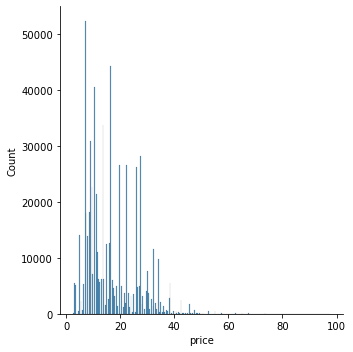

In [23]:
sns.displot(df['price'])

Berdasarkan histogram dan plot distribusi peluang, keduanya sama-sama menunjukkan adanya kecenderungan distribusi data yang miring ke kanan.

Korelasi antar kolom pada set data dapat diketahui menggunakan fungsi `.corr()`.

In [24]:
df.corr()

,surge_multiplier,distance,price
surge_multiplier,1.000000,0.025946,0.240458
distance,0.025946,1.000000,0.345061
price,0.240458,0.345061,1.000000


Jika ingin diketahui visualisasi dari korelasi antar kolom, maka dapat digunakan plot jenis heatmap yang didapatkan menggunakan fungsi `sns.heatmap()`.

<AxesSubplot:>

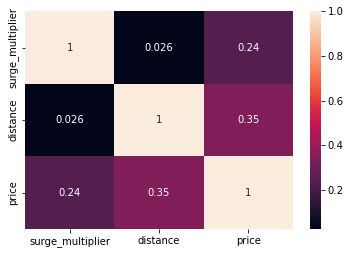

In [25]:
sns.heatmap(df.corr(),annot=True)

Dapat diketahui bahwa korelasi antar kolom pada set data sangat kecil dan bernilai mendekati nol. Korelasi paling besar ditemukan pada kolom price dengan kolom distance.

### Pre-Processing Data

#### Encode Data

Proses label encoding dilakukan untuk memetakan setiap data numerik pada set data menjadi sebuah angka.

In [26]:
df['name'].replace({'Shared':1,'UberPool':2,'Lyft':3,'UberX':4,'UberXL':5,'WAV':6,'Lyft XL':7,'Lux':8,'Black':9,'Lux Black':10,'Lux Black XL':11,'Black SUV':12},inplace=True)

#### Splitting Data

Splitting data dilakukan untuk membagi data menjadi 2 set/bagian yaitu training set dan test set. Pembagian data training dan data testing dilakukan secara acak. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model. Sebelum dilakukan proses splitting data, masing-masing data feature dan data label perlu didefinisikan terlebih dahulu.

* X : data feature
* y : data label



In [27]:
X = df.drop(['price','cab_type'],axis=1)
y = df['price']

In [28]:
X

,name,surge_multiplier,distance
0,1,1.0,0.44
1,8,1.0,0.44
2,3,1.0,0.44
3,11,1.0,0.44
4,7,1.0,0.44
...,...,...,...
693065,6,1.0,1.00
693066,5,1.0,1.00
693067,4,1.0,1.00
693069,12,1.0,1.00


Proses splitting data dapat menggunakan fungsi `train_test_split()` dengan parameter:

- X : data feature
- y : data label
- test_size : ukuran test data yaitu 30%
- random_state : status pseudo-random number generator

In [29]:
# train 70%, test 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Banyaknya data pada masing masing set dapat diketahui menggunakan fungsi `len()`.

In [30]:
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))
print('Training\t\t: {0:0.02f}% ada pada dataset'.format((len(X_train)/len(df.name)) * 100))
print('Test\t\t\t: {0:0.02f}% ada pada dataset'.format((len(X_test)/len(df.name)) * 100))

Training dataset	: 446583
Testing dataset		: 191393
Training		: 70.00% ada pada dataset
Test			: 30.00% ada pada dataset


### Pendefinisian Model

#### Linear Regression

Model linear regression terdiri dari satu atau lebih variabel independen (X) dan memiliki satu variabel dependen (y). Tujuan dari model ini adalah untuk menemukan hubungan linier yang terbaik antara variabel dependen dan variabel independen dengan menggunakan koefisien regresi yang optimal.
1. Sederhana dan Mudah Dipahami : Karena hanya melibatkan hubungan liniear antara variabel dependen dan variabel independen
2. Komputasi Cepat: Hanya melibatkan operasi matematika dasar
3. Interpretasi Variabel: Koefisien regresi pada model Linear Regression dapat diinterpretasikan dengan mudah dan dapat memberikan informasi tentang seberapa besar pengaruh dari setiap variabel
4. Prediksi Akurat: Jika model Linear Regression sudah sesuai dengan data yang ada, maka model ini dapat memberikan prediksi yang cukup akurat

fit_intercept(True) untuk menambahkan nilai intercept, yang sangat penting dalam model Linear Regression karena jika tidak termasuk dalam model, maka garis regresi akan selalu melewati titik koordinat (0,0) 

copy_X(true) jika dataset yang digunakan cukup besar, disarankan untuk mengatur nilai copy_X menjadi True, sehingga data yang diolah oleh model tidak mengganggu dataset yang asli.

n_jobs(None) nilai n_jobs hanya efektif jika dataset yang digunakan cukup besar, dan jumlah core pada komputer yang digunakan juga mencukupi. Jika dataset yang digunakan tidak terlalu besar, atau jumlah core pada komputer tidak cukup, penggunaan nilai n_jobs yang terlalu besar justru dapat membuat proses training model menjadi lebih lambat.

positive(true) karena semua nilai dari variabel harus bernilai positive

In [31]:
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=True)

#### XG Boost Regressor

XGBoost (Extreme Gradient Boosting) Regression adalah jenis model regresi yang dikembangkan menggunakan ekstensi dari model pohon keputusan yang ditingkatkan dengan teknik boosting.

Model XGBoost Regresi memanfaatkan teknik pembelajaran mesin yang kuat dan dapat digunakan untuk memprediksi variabel target yang kontinu (numerik).

XGBoost menggabungkan beberapa model pohon keputusan yang lemah untuk membentuk model yang lebih kuat. Setiap pohon keputusan dibangun dengan mempertimbangkan residual (selisih antara nilai prediksi model saat ini dan nilai target yang sebenarnya) dari model sebelumnya. Dengan cara ini, model XGBoost dapat memperbaiki prediksi pada setiap iterasi.

Akurai yang Tinggi: menggunakan teknik ensemble learning dengan memadukan beberapa model pohon keputusan untuk membuat model yang lebih akurat dan stabil.

Skalabilitas : dapat dengan mudah menangani data yang sangat besar dan kompleks dengan fitur yang banyak. Model ini mendukung parallel processing yang mempercepat waktu pelatihan model.

Penanganan Missing Values: dapat menangani nilai yang hilang dalam data dan memungkinkan penggunaan data yang tidak lengkap.

Regularisasi: membantu mencegah overfitting dan menghasilkan model yang lebih umum.

Interpretasi: pengguna dapat memahami faktor apa yang paling mempengaruhi target.

In [32]:
xgb_r = xg.XGBRegressor(objective='reg:linear',n_estimators = 10, seed = 123)

objective(reg:linear) artinya fungsi objektif yang digunakan adalah Mean Squared Error(MSE). Tujuannya adalah untuk meminimalkan MSE dengan menemukan bobot yang optimal untuk setiap pohon keputusan. Cocok untuk masalah regresi dimana targetnya adalah numerik dan kontinu

n_estimators(10) menentukan jumlah pohon keputusan yang dibuat dalam model. Semakin banyak pohon, semakin kompleks, dan semakin akurat, tetapi akan membutuhkan waktu dalam melatih model. nilai 10 akan mejadi nilai yang cukup akurat namun tidak memberatkan

seed(123) merupakan nilai awal untuk menginisiasi generator bilangan acak. menentukan nilai seed untuk memastikan bahwa dalam tiap eksekusi hasilnya akan konsisten, jika tidak diatur makan hasil bisa saja berbeda-beda setiap dieksekusi

#### Random Forest Regressor

Random Forest Regressor adalah salah satu jenis algoritma Machine Learning yang digunakan untuk melakukan prediksi nilai numerik atau kontinu berdasarkan fitur atau atribut lainnya. Model ini menggabungkan banyak pohon keputusan (decision trees) ke dalam satu model yang lebih besar. Setiap pohon keputusan dalam model random forest dihasilkan secara acak dan independen satu sama lain.

Dalam model random forest regressor, setiap pohon keputusan memiliki bobot yang sama pentingnya, sehingga prediksi akhir didapatkan dari hasil penggabungan semua pohon keputusan. Model ini dapat digunakan untuk memprediksi nilai numerik, seperti harga rumah, suhu, atau penghasilan berdasarkan fitur atau atribut lainnya.

1. Mampu menangani data yang kompleks: Model ini dapat menangani dataset dengan banyak fitur dan pola yang kompleks. 

2. Tidak sensitif terhadap overfitting: Model ini dapat menghindari overfitting pada data yang digunakan karena setiap pohon keputusan dihasilkan secara acak dan independen satu sama lain.

3. Mudah diimplementasikan: Model ini mudah diimplementasikan dan cepat dalam proses pelatihan dan pengujian. Juga tidak memerlukan banyak tuning parameter seperti pada model lainnya.

4. Stabil dan akurat: Model ini dapat memberikan hasil prediksi yang stabil dan akurat pada data yang belum pernah dilihat sebelumnya. Sehingga model ini dapat diandalkan dalam membuat prediksi nilai numerik atau kontinu pada data baru.

In [33]:
rf_r = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)

n_estimators(100) menentukan jumlah pohon keputusan dalam model

max_depth merupakan kedalaman maksimum setiap pohon keputusan, semakin dalam semakin komplek dan lama dalam pelatihan model

random_state(33) untuk memastikan pohon keputusan yang dihasilkan pada setiap pelatihan model akan selalu sama dan memudahkan dalam melakukan evaluasi dan debugging model

### Pelatihan Model

#### Linear Regression

In [34]:
model_lr = lr.fit(X_train, y_train)
y_pred_lr=model_lr.predict(X_test)

Melatih model Linear Regression dengan variabel independen X_train, dan variabel independen y_train
Kemudian melakukan prediksi terhadap variabel independen X_test

In [35]:
pred=pd.DataFrame(y_test[:10])
pred['predict']=y_pred_lr[:10]
pred

,price,predict
677566,19.5,22.331269
308691,10.5,8.872165
396241,5.0,6.329073
136589,16.5,19.344355
198998,38.5,27.969220
179736,16.5,18.532651
311934,30.5,26.365775
510750,19.5,21.751476
6135,13.5,14.957952
313476,10.5,16.293469


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi sedikit berbeda dengan nilai price asli namun cukup relevan.

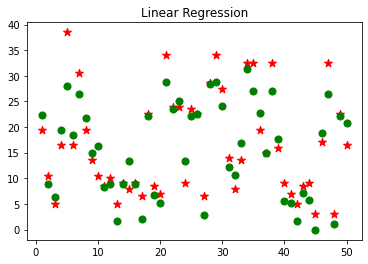

In [36]:
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_pred_lr[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.title('Linear Regression')
plt.show()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi pada beberapa nilai yang sangat dekat dengan nilai asli

#### XG Boost

In [37]:
model_xgb = xgb_r.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

[13:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
pred=pd.DataFrame(y_test[:10])
pred['predict']=y_pred_xgb[:10]
pred

,price,predict
677566,19.5,20.700537
308691,10.5,11.035725
396241,5.0,6.815862
136589,16.5,16.463526
198998,38.5,32.052662
179736,16.5,15.857824
311934,30.5,26.752405
510750,19.5,19.845627
6135,13.5,11.189965
313476,10.5,12.049274


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi yang cukup dekat dengan nilai aslinya, namun terdapat beberapa nilai yang masih memiiki selisih tapi tidak terlalu jauh.

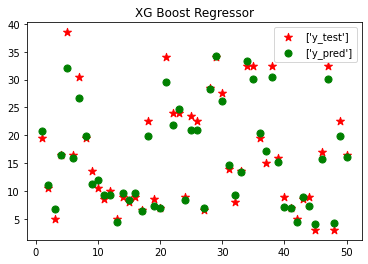

In [39]:
plt.title('XG Boost Regressor')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_pred_xgb[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi pada beberapa nilai yang sangat dekat dengan nilai aslinya

#### Random Forest Regressor

In [40]:
model_rf = rf_r.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Melatih model XG Boost Regressor dengan variabel independen X_train, dan variabel independen y_train Kemudian melakukan prediksi terhadap variabel independen X_test

In [41]:
pred=pd.DataFrame(y_test[:10])
pred['predict']=y_pred_rf[:10]
pred

,price,predict
677566,19.5,24.282661
308691,10.5,10.473163
396241,5.0,6.755418
136589,16.5,15.794879
198998,38.5,31.391371
179736,16.5,15.266989
311934,30.5,18.857705
510750,19.5,19.525882
6135,13.5,10.659412
313476,10.5,12.658375


Menggunakan Data Frame untuk melihat 10 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil beberapa nilai prediksi yang cukup dekat dengan nilai aslinya, namun terdapat beberapa nilai yang memiliki perbedaan cukup besar.

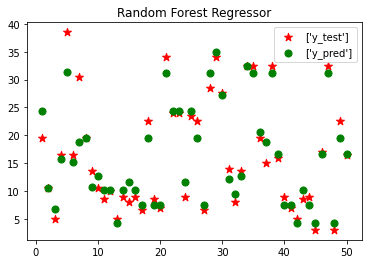

In [42]:
plt.title('Random Forest Regressor')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_pred_rf[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()

Menggunakan Scatter Plot untuk melihat 50 pertama hasil output prediksi dari data X_test kemudian dibandingkan dengan nilai price real dari y_test, yang menunjukkan hasil prediksi pada beberapa nilai yang sangat dekat dengan nilai aslinya, dan terdapat beberapa nilai yang memiliki perbedaan namun tidak terlalu jauh

### Model Evaluation

#### Linear Regression

In [43]:
y_pred_lr

array([22.33126909,  8.87216459,  6.32907281, ..., 41.22379093,
       21.72749997, 19.86816878])

In [44]:
print(lr.coef_)
print(lr.intercept_)

[ 2.20320041 18.00885496  2.79897762]
-22.167956321343542


In [45]:
X_train.columns

Index(['name', 'surge_multiplier', 'distance'], dtype='object')

Model Linear Regressionnya adalah y = 2.20320041X1 + 18.00885496X2 + 2.79897762X3 - 22.167956321343542 

In [46]:
print('Akurasi dari model Linear Regression adalah :',r2_score(y_test, y_pred_lr))
mse = mean_squared_error(y_test,y_pred_lr)
rootmeansq = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
print('MSE dari model Linear Regression :',mse)
print('RMSE dari model Linear Regression :', rootmeansq)
print('MAPE dari model Linear Regression :', mape)

Akurasi dari model Linear Regression adalah : 0.8345268968613591
MSE dari model Linear Regression : 14.27379142123133
RMSE dari model Linear Regression : 3.7780671541452686
MAPE dari model Linear Regression : 0.23304005445548495


Terlihat hasil dari akurasi model Liner Regression tersebut dengan menggunakan R^2 score didapatkan sebesar 0.83453.
Dapat Disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data.

Dengan melihat nilai MSE dari model Linear Regression sebesar 14.2738 yang berarti terdapat kesalahan sebesar 14.2738 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut cukup besar yang berarti tingkat error dalam memprediksi juga cukup besar.

Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari model Linear Regression didapat RMSE sebesar 3.7780, nilai RMSE tersebut cukup besar yang berarti tingkat error dalam memprediksi juga cukup besar.

Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE model Random Forest sebesar 0.2330 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 23% yang mana nilai ini cukup besar.

#### Random Forest

In [47]:
y_pred_rf

array([24.28266056, 10.47316256,  6.7554181 , ..., 31.74358426,
       27.16520583, 16.66157941])

In [48]:
print('Akurasi dari model Random Forest adalah :',r2_score(y_test, y_pred_rf))
mse = mean_squared_error(y_test,y_pred_rf)
rootmeansq = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print('MSE dari model Random Forest :',mse)
print('RMSE dari model Random Forest :', rootmeansq)
print('MAPE dari model Random Forest :', mape)

Akurasi dari model Random Forest adalah : 0.9258002334519485
MSE dari model Random Forest : 6.400508427787038
RMSE dari model Random Forest : 2.529922613003615
MAPE dari model Random Forest : 0.1237293147757051


Terlihat hasil dari akurasi model Random Forest tersebut dengan menggunakan R^2 score didapatkan sebesar 0.92580.
Dapat Disimpulkan bahwa model tersebut sudah baik dalam memprediksi data.

Dengan melihat nilai MSE dari model Linear Regression sebesar 6.4005 yang berarti terdapat kesalahan sebesar 6.4005 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut cukup kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga cukup kecil.

Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari model Linear Regression didapat RMSE sebesar 2.5299, nilai RMSE tersebut cukup kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga cukup kecil.

Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE model Random Forest sebesar 0.1237 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 12% yang mana nilai tersebut cukup kecil, sehingga model sudah baik dalam memprediksi.

#### XGBoost

In [49]:
y_pred_xgb

array([20.700537, 11.035725,  6.815862, ..., 40.208115, 26.146915,
       16.615942], dtype=float32)

In [50]:
print('Akurasi dari model XGBoost adalah :',r2_score(y_test, y_pred_xgb))
mse = mean_squared_error(y_test,y_pred_xgb)
rootmeansq = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print('MSE dari model XGBoost :',mse)
print('RMSE dari model XGBoost :', rootmeansq)
print('MAPE dari model XGBoost :', mape)

Akurasi dari model XGBoost adalah : 0.9599179862892132
MSE dari model XGBoost : 3.45749425495064
RMSE dari model XGBoost : 1.8594338533410215
MAPE dari model XGBoost : 0.0853175849871993


Terlihat hasil dari akurasi model XGBoost tersebut dengan menggunakan R^2 score didapatkan sebesar 0.95991.
Dapat Disimpulkan bahwa model tersebut sudah baik dalam memprediksi data.

Dengan melihat nilai MSE dari model Linear Regression sebesar 3.4574 yang berarti terdapat kesalahan sebesar 3.4574 dalam model tersebut memprediksi nilai, terlihat bahwa nilai MSE dari model tersebut kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga kecil, yang artinya model tersebut sudah baik dalam memprediksi serta error dalam memprediksi juga cukup kecil.

Nilai RMSE merupakan turunan dari nilai MSE, terlihat dari model Linear Regression didapat RMSE sebesar 1.8594, nilai RMSE tersebut sudah kecil yang berarti tingkat error atau kesalahan model dalam memprediksi juga kecil atau sebesar < 2.

Nilai MAPE merupakan persentase kesalahan absolut rata-rata antara nilai prediksi dan nilai aktual. Terlihat dari nilai MAPE model XGBoost sebesar 0.08531 atau rata-rata kesalahan dari model tersebut dalam memprediksi yaitu sebesar 8% yang mana nilai tersebut cukup kecil, sehingga model tersebut sudah baik dalam memprediksi.

### Kesimpulan

Berdasarkan hasil analisis diatas, dapat disimpulkan bahwa:
- Data untuk kolom price memiliki distribusi yang tidak normal hal ini terlihat dari distribution plot, sehingga data tidak terdistribusi secara merata dan lebih cendrung ke kanan atau positive skew.
- Dari grafik persebaran data surge multiplier, distance, dan price terlihat bahwa terdapat data outlier dari grafik tersebut.
- Dari model-model machine learning yang telah diterapkan, diambil kesimpulan bahwa model XGBoost merupakan model terbaik untuk memprediksi.
Karena,nilai akurasi atau R^2 skornya yang paling besar yaitu 0.95991. Selain itu, nilai MSE atau rata-rata kesalahan nilai antara prediksi dan aktualnya yg kecil sebesar 3.4574, dan total presentase kesalahan absolut dari model tersebut dengan menggunakan MAPE yang kecil sebesar 8%.
- Berdasarkan model linear regression yaitu y = 2.20320041X1 + 18.00885496X2 + 2.79897762X3 - 22.167956321343542 terlihat bahwa intercept pada model yang dibuat adalah sekitar - 22.167956321343542, dan variabel yang paling mempengaruhi price dari model tersebut adalah variabel 'surge_multiplier', karena memiliki nilai slope terbesar yaitu 18.00885496